# How to create xG Flow chart

Based on the [video](https://www.youtube.com/watch?v=bvoOOYMQkac) by McKay Johns

## Preparation

### Imports

In [30]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### Scraping from Understat

In [31]:
# Scrape game shots from a premier league game Brighton vs Man City in 2021/22
url = 'https://understat.com/match/16458'

# Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [32]:
# Get only the shotsData
strings = scripts[1].string
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22437984\\x22,\\x22minute\\x22\\x3A\\x2216\\x22,\\x22result\\x22\\x3A\\x22MissedShots\\x22,\\x22X\\x22\\x3A\\x220.8530000305175781\\x22,\\x22Y\\x22\\x3A\\x220.455\\x22,\\x22xG\\x22\\x3A\\x220.07785716652870178\\x22,\\x22player\\x22\\x3A\\x22Leandro\\x20Trossard\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x227698\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222021\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x2216458\\x22,\\x22h_team\\x22\\x3A\\x22Brighton\\x22,\\x22a_team\\x22\\x3A\\x22Manchester\\x20City\\x22,\\x22h_goals\\x22\\x3A\\x221\\x22,\\x22a_goals\\x22\\x3A\\x224\\x22,\\x22date\\x22\\x3A\\x222021\\x2D10\\x2D23\\x2016\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Pascal\\x20Gro\\x5Cu00df\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22437985\\x22,\\x22minute\\x22\\x3A\\x2217\\x22,\\x22re

In [33]:
# Strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('") + 2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

# Convert string to json format
data = json.loads(json_data)
data

{'h': [{'id': '437984',
   'minute': '16',
   'result': 'MissedShots',
   'X': '0.8530000305175781',
   'Y': '0.455',
   'xG': '0.07785716652870178',
   'player': 'Leandro Trossard',
   'h_a': 'h',
   'player_id': '7698',
   'situation': 'OpenPlay',
   'season': '2021',
   'shotType': 'LeftFoot',
   'match_id': '16458',
   'h_team': 'Brighton',
   'a_team': 'Manchester City',
   'h_goals': '1',
   'a_goals': '4',
   'date': '2021-10-23 16:30:00',
   'player_assisted': 'Pascal Groß',
   'lastAction': 'Pass'},
  {'id': '437985',
   'minute': '17',
   'result': 'MissedShots',
   'X': '0.895',
   'Y': '0.5540000152587891',
   'xG': '0.05154167860746384',
   'player': 'Jakub Moder',
   'h_a': 'h',
   'player_id': '9284',
   'situation': 'OpenPlay',
   'season': '2021',
   'shotType': 'Head',
   'match_id': '16458',
   'h_team': 'Brighton',
   'a_team': 'Manchester City',
   'h_goals': '1',
   'a_goals': '4',
   'date': '2021-10-23 16:30:00',
   'player_assisted': 'Leandro Trossard',
   'las

In [34]:
# Convert this JSON to pandas dataframe
minute = []
team = []
xG = []
player = []
result = []
data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'minute':
            minute.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'minute':
            minute.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])

col_names = ['minute', 'team', 'xG', 'player', 'result']
df = pd.DataFrame([minute,team,xG,player,result], index = col_names)
df = df.T
df

,minute,team,xG,player,result
0,16,Brighton,0.07785716652870178,Leandro Trossard,MissedShots
1,17,Brighton,0.05154167860746384,Jakub Moder,MissedShots
2,42,Brighton,0.025069452822208405,Solly March,SavedShot
3,54,Brighton,0.08171696215867996,Pascal Groß,SavedShot
4,57,Brighton,0.02285812981426716,Leandro Trossard,SavedShot
5,60,Brighton,0.06174878776073456,Leandro Trossard,SavedShot
6,63,Brighton,0.03441314026713371,Jakub Moder,BlockedShot
7,73,Brighton,0.011097980663180351,Solly March,MissedShots
8,80,Brighton,0.7611688375473022,Alexis Mac Allister,Goal
9,85,Brighton,0.04203129932284355,Tariq Lamptey,MissedShots


## Creating the flow

### Preparing the data

In [35]:
# Now that we have our dataframe set up, we are going to create some lists to plot the different xG values
# 4 lists - home and away xg and minutes
# We start these with zero so our charts will start at 0
a_xG = [0]
h_xG= [0]
a_min = [0]
h_min = [0]


# This finds our team names from the dataframe. This will only work as long as both teams took a shot
hteam = df['team'].iloc[0] # Team at first row
ateam = df['team'].iloc[-1] # Team at last row

for x in range(len(df['xG'])):
    if df['team'][x] == ateam:
        a_xG.append(float(df['xG'][x]))
        a_min.append(int(df['minute'][x]))
    if df['team'][x] == hteam:
        h_xG.append(float(df['xG'][x]))
        h_min.append(int(df['minute'][x]))

In [36]:
a_xG

[0,
 0.022751478478312492,
 0.013071568682789803,
 0.14621154963970184,
 0.09500729292631149,
 0.07536879181861877,
 0.9693750143051147,
 0.08526260405778885,
 0.08451063930988312,
 0.5529646873474121,
 0.07374688237905502,
 0.0785723403096199,
 0.12064763158559799,
 0.10588495433330536,
 0.023348312824964523,
 0.0391872376203537,
 0.017626933753490448,
 0.08955137431621552,
 0.09714128822088242,
 0.33352798223495483,
 0.07610230892896652,
 0.08031006902456284,
 0.048177652060985565,
 0.43516111373901367]

In [37]:
# This is the function we use to make our xG values be cumulative rather than single shot values
# It goes through the list and adds the numbers together
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

a_cumulative

[0,
 0.022751478478312492,
 0.035823047161102295,
 0.18203459680080414,
 0.27704188972711563,
 0.3524106815457344,
 1.3217856958508492,
 1.407048299908638,
 1.4915589392185211,
 2.0445236265659332,
 2.1182705089449883,
 2.196842849254608,
 2.317490480840206,
 2.4233754351735115,
 2.446723747998476,
 2.4859109856188297,
 2.50353791937232,
 2.5930892936885357,
 2.690230581909418,
 3.023758564144373,
 3.0998608730733395,
 3.1801709420979023,
 3.228348594158888,
 3.6635097078979015]

In [38]:
# This is used to find the total xG. It just creates a new variable from the last item in the cumulative list
a_total = round(a_cumulative[-1], 2)
h_total = round(h_cumulative[-1], 2)

### Plotting

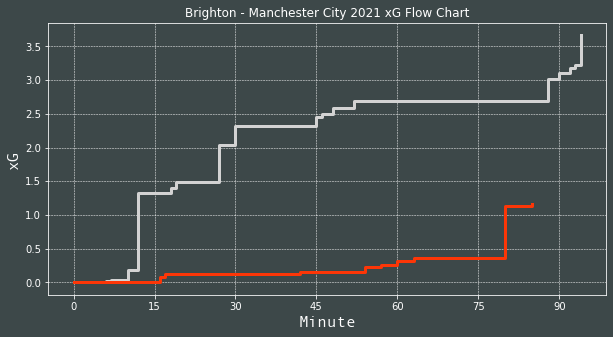

In [50]:
fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

# Title
ax.set_title('Brighton - Manchester City 2021 xG Flow Chart', color = 'white')

# Color of ticks
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

# X Ticks labels
plt.xticks([0,15,30,45,60,75,90])

# Labels
plt.xlabel('Minute',fontname='Andale Mono',color='white',fontsize=16)
plt.ylabel('xG',fontname='Andale Mono',color='white',fontsize=16)

# Color of the grid
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

# Color of the frame
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Plot the step graphs
ax.step(x=a_min,y=a_cumulative,color='#d3d3d3',label=ateam,linewidth=3,where='post')
ax.step(x=h_min,y=h_cumulative,color='#fd3607',label=ateam,linewidth=3,where='post')

In [51]:
fig.savefig('brighton-vs-mancity-2021-22.png')